In [1]:
# importtation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("regression_multiple.csv")
data.head()

,Superficie,Nombre de chambres,Proximité du centre,Prix
0,152,1,9.306509,476.279241
1,142,5,5.629593,535.910505
2,64,5,8.499316,279.067426
3,156,3,5.449101,531.408138
4,121,2,6.424064,411.389675


In [3]:
data.shape

(1000, 4)

In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Superficie           1000 non-null   int64  
 1   Nombre de chambres   1000 non-null   int64  
 2   Proximité du centre  1000 non-null   float64
 3   Prix                 1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [7]:
X = df.drop("Prix", axis=1)
y = df["Prix"]

X.shape , y.shape

((1000, 3), (1000,))

In [8]:
#speraper les donnees en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [9]:
#regression lineaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#evaluation du modele
y_pred = model.predict(X_test)
#afficher les valeurs prédites et les vraies valeurs dans un dataframe
df = pd.DataFrame({"Vraies valeurs": y_test, "Valeurs prédites": y_pred})
df

,Vraies valeurs,Valeurs prédites
521,374.276012,385.282914
737,605.801574,633.842678
740,419.368326,424.365686
660,306.497993,326.717151
411,285.515092,304.818554
...,...,...
408,430.566369,442.890110
332,348.698167,378.837892
208,242.595532,216.634636
613,347.880193,335.085211


MSE Entraînement: 390.2340964300977
MSE Test: 354.38714759725394


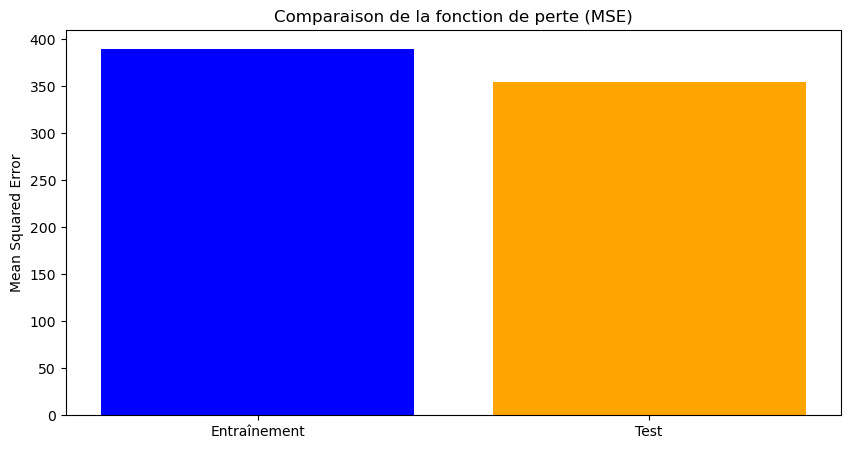

In [11]:
# Calculer la fonction de perte (MSE) pour l'ensemble d'entraînement
y_train_pred = model.predict(X_train)
mse_train = np.mean((y_train - y_train_pred) ** 2)

# Calculer la fonction de perte (MSE) pour l'ensemble de test
y_test_pred = model.predict(X_test)
mse_test = np.mean((y_test - y_test_pred) ** 2)

# Afficher les valeurs de MSE
print(f"MSE Entraînement: {mse_train}")
print(f"MSE Test: {mse_test}")

# Tracer les valeurs de MSE et R2
plt.figure(figsize=(10, 5))
plt.bar(['Entraînement', 'Test'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title('Comparaison de la fonction de perte (MSE)')
plt.ylabel('Mean Squared Error')
plt.show()

In [13]:
#metrique de performance de la regression lineaire entre les valeurs prédites et les vraies valeurs
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
r3 = r2_score(y_train, y_train_pred)
print(f"R2: {r3}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")

R2: 0.9818586860801203
MSE: 354.38714759725394
R2: 0.9774939480770738
MSE: 390.2340964300977


In [15]:
#contruire les nouvelles données et les prédire
new_data = pd.DataFrame({"Superficie": [200, 300, 400], "Nombre de chambres": [2, 3, 4], "Proximité du centre": [9.5, 8, 7]})
new_data

,Superficie,Nombre de chambres,Proximité du centre
0,200,2,9.5
1,300,3,8.0
2,400,4,7.0


In [17]:
prediction = model.predict(new_data)
# afficher les valeurs prédites dans un dataframe
df_new = pd.DataFrame({"Superficie": new_data["Superficie"], "Nombre de chambres": new_data["Nombre de chambres"], "Proximité du centre": new_data["Proximité du centre"], "Prix prédit": prediction})
df_new

,Superficie,Nombre de chambres,Proximité du centre,Prix prédit
0,200,2,9.5,650.084859
1,300,3,8.0,964.015445
2,400,4,7.0,1276.943225


In [18]:

import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']